# Fake News Detection using ML 
# Ayush Ranjan
Data Science with Python Project

### Importing Libraries

In [1]:
import pandas as pd #for importing dataset
import numpy as np #for doing mathematical operations 
import seaborn as sns
from sklearn.model_selection import train_test_split as ttp #to break dataset for training and testing
from sklearn.metrics import classification_report # to generate classification report
import re #for data cleaning purpose
import string #to deal with text data
import matplotlib.pyplot as plt #for visualizing dataset

### Reading Two Datasets - Real and Fake 


In [2]:
data_true=pd.read_csv("C:\\Users\\hp\\Downloads\\True.csv")
data_fake=pd.read_csv("C:\\Users\\hp\\Downloads\\Fake.csv")

#### Printing top 5 values from both Dataset 

In [3]:
data_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
data_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


#### Checking Size of Datasets 

In [5]:
data_true.shape, data_fake.shape

((21417, 4), (23481, 4))

### Adding column name "class" in both datasets

In [6]:
data_true["class"]=1
data_fake["class"]=0

###  Taking last 10 values for Manual Testing from both Datasets 

In [7]:
data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis=0, inplace=True)#removing those 10 values from original dataset
    
data_fake_manual_testing = data_fake.tail(10)
for i in range(21416,21406,-1):
    data_fake.drop([i],axis=0, inplace=True)#removing those 10 values from original dataset

### Merging these two datasets in single dataframe

In [8]:
data_manual_testing = pd.concat([data_fake_manual_testing, data_true_manual_testing], axis=0)
data_manual_testing.to_csv("manual_testing.csv ")

### Merging main two datasets

In [9]:
data_merge = pd.concat([data_fake,data_true],axis=0)
data_merge.head(10)   #displaying first 10 values after above operation

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


### Performing some Basic Data Visualizations

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4449
politics            6841
politicsNews       11272
worldnews          10135
Name: text, dtype: int64


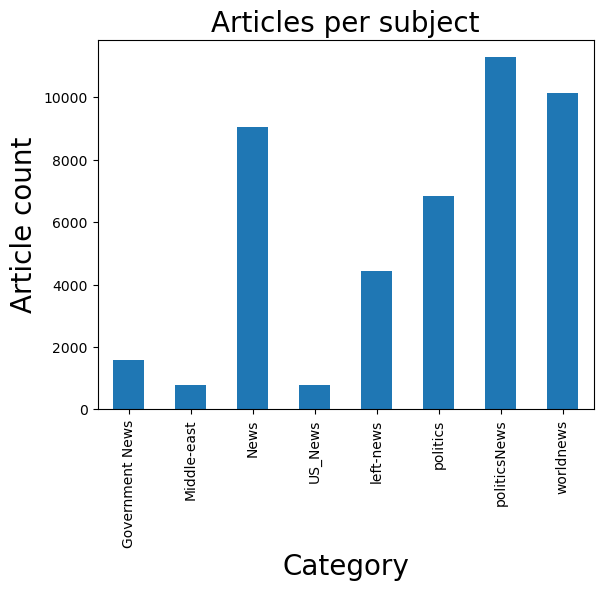

In [10]:
print(data_merge.groupby(['subject'])['text'].count())
data_merge.groupby(['subject'])['text'].count().plot(kind="bar")
plt.title("Articles per subject",size=20)
plt.xlabel("Category",size=20)
plt.ylabel("Article count",size=20)
plt.show()

class
0    23471
1    21407
Name: text, dtype: int64
0 = Fake news
1 = True news


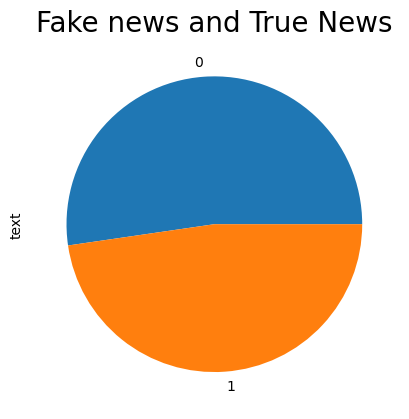

In [11]:
print(data_merge.groupby(['class'])['text'].count())
print("0 = Fake news\n1 = True news")
data_merge.groupby(['class'])['text'].count().plot(kind="pie")
plt.title("Fake news and True News",size=20)
plt.show()

### Removing 3 columns from dataset 

In [12]:
data = data_merge.drop(["title","subject","date"], axis=1)
data.head(10) #displaying remaining dataset 

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


### Shuffling the dataset for better prediction

In [13]:
data=data.sample(frac=1)
data.head(10)

,text,class
20766,Is anyone else out there sick of the racist ha...,0
12242,"The shrill, old socialist Carla Marx wannabe...",0
11400,Watch Tucker Carlson point out that Trump paid...,0
2962,Before running the most controversial and bomb...,0
11918,Brigitte Gabriel was born in the Marjeyoun Dis...,0
14673,You certainly don t want to get caught showing...,0
11871,BRUSSELS (Reuters) - European Commission Presi...,1
3810,SHANGHAI (Reuters) - The company owned by the ...,1
4775,WASHINGTON (Reuters) - The head of the U.S. Ho...,1
2592,Things got very uncomfortable for Jason Chaffe...,0


### Checking for null values in dataset

In [14]:
data.isnull().sum()

text     0
class    0
dtype: int64

### Creating Data Filtering function to remove unwanted data from text

In [15]:
def filtering(data):
    text=data.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\s+|www\.S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

### Filtering data of our text column using above function

In [16]:
data["text"]= data["text"].apply(filtering)
data.head(10)

,text,class
20766,is anyone else out there sick of the racist ha...,0
12242,the shrill old socialist carla marx wannabe...,0
11400,watch tucker carlson point out that trump paid...,0
2962,before running the most controversial and bomb...,0
11918,brigitte gabriel was born in the marjeyoun dis...,0
14673,you certainly don t want to get caught showing...,0
11871,brussels reuters european commission presi...,1
3810,shanghai reuters the company owned by the ...,1
4775,washington reuters the head of the u s ho...,1
2592,things got very uncomfortable for jason chaffe...,0


### Creating Dependent & Independant Variables 

In [17]:
x=data["text"]
y=data["class"]

### Splitting dataset for training and testing purpose 

In [18]:
x_train,x_test,y_train,y_test=ttp(x,y,test_size=0.25,random_state=0)

### VECTORIZING the text


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
vector = TfidfVectorizer() # creating object 
#Learn vocabulary and IDF(inverse document frequency), return document-term matrix. 
#IDF returns numerical statics that how the word is important to the document
xv_train=vector.fit_transform(x_train)
xv_test=vector.transform(x_test)

## Classification using various classifiers

### Logistic Regression


In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
LR=LogisticRegression()
LR.fit(xv_train,y_train) #training or fitting the model to the training set

LogisticRegression()

In [23]:
LR.score(xv_test,y_test).round(2) # method computes the accuracy score

0.99

In [24]:
pred_LR= LR.predict(xv_test) # Predict using the linear model

In [25]:
print(classification_report(y_test,pred_LR)) #creating classification report

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5859
           1       0.99      0.99      0.99      5361

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



### Creating CONFUSION MATRIX


[[5779   80]
 [  62 5299]]


<Axes: >

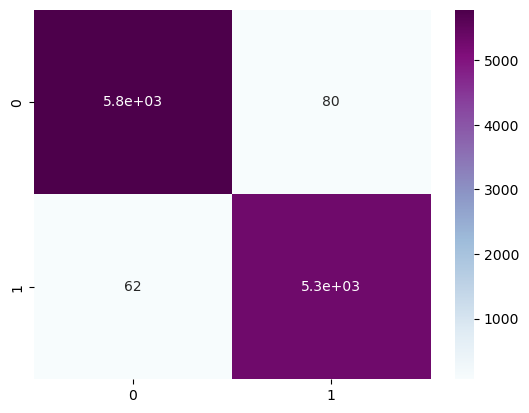

In [26]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,pred_LR)  
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="BuPu",annot=True)


### DECISION TREE Classification 

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
DT = DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [29]:
DT.score(xv_test,y_test).round(2)

1.0

In [30]:
pred_DT = DT.predict(xv_test)

In [31]:
print(classification_report(y_test,pred_DT))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5859
           1       1.00      0.99      0.99      5361

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



[[5836   23]
 [  31 5330]]


<Axes: >

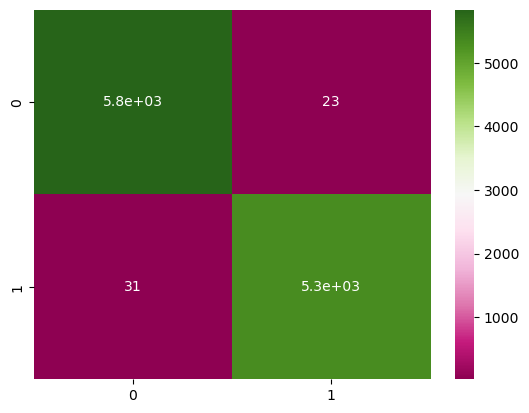

In [32]:
cm= confusion_matrix(y_test,pred_DT)  
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="PiYG",annot=True)

### RANDOM FOREST CLASSIFIER

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train,y_train)

RandomForestClassifier(random_state=0)

In [35]:
RFC.score(xv_test,y_test)

0.9877896613190731

In [36]:
pred_RFC = RFC.predict(xv_test)

In [37]:
print(classification_report(y_test,pred_RFC))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5859
           1       0.99      0.99      0.99      5361

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



[[5797   62]
 [  75 5286]]


<Axes: >

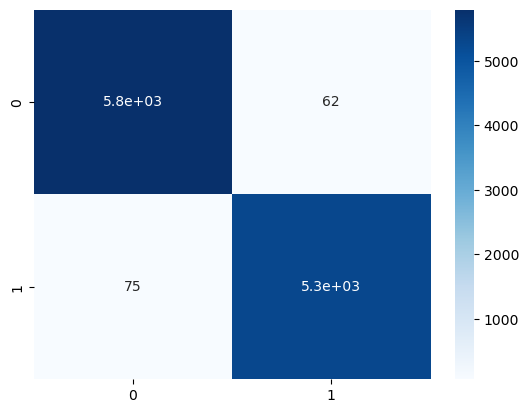

In [38]:
cm= confusion_matrix(y_test,pred_RFC)  
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="Blues",annot=True)

## MANUAL TESTING

In [39]:
def output_lable(n):
    if n == 0:
        return "FAKE News"
    elif n == 1:
        return "TRUE News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(filtering) 
    new_x_test = new_def_test["text"]
    new_xv_test = vector.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction:  {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),
                                                                                            output_lable(pred_DT[0]),                                                                                                                                                                                                                        
                                                                                                output_lable(pred_RFC[0]))) 
     

In [40]:
news = str(input())
manual_testing(news)



LR Prediction: FAKE News 
DT Prediction:  FAKE News 
RFC Prediction: FAKE News


In [41]:
import pickle
pickle.dump(LR, open('./model.sav', 'wb'))
pickle.dump(DT, open('./model.sav', 'wb'))
pickle.dump(RFC, open('./model.sav', 'wb'))


In [42]:
#Load the model from disk
loaded_model = pickle.load(open('./model.sav', 'rb'))


In [43]:
def manual_testing(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = loaded_model.predict (vectorized_input_data)
    print (prediction)